In [1]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
vocab_size = 10000

Vocab Size is the unique words (approximation) contained in the dataset. (https://www.tensorflow.org/api_docs/python/tf/keras/datasets/imdb/load_data#:~:text=only%20consider%20the%20top%2010%2C000%20most%20common%20words%2C)

In [6]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.imdb.load_data(num_words=vocab_size)

In [8]:
(x_train.shape, y_train.shape), (x_test.shape, y_test.shape)

(((25000,), (25000,)), ((25000,), (25000,)))

In [10]:
x_train[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [12]:
int(np.mean(np.array([len(row) for row in x_train])).round())

239

This is the average length of a review in the dataset.

In [15]:
max_length = int(np.mean(np.array([len(row) for row in x_train])).round())

In [17]:
x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train, maxlen=max_length)
x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test, maxlen=max_length)

In [19]:
(x_train.shape, y_train.shape), (x_test.shape, y_test.shape)

(((25000, 239), (25000,)), ((25000, 239), (25000,)))

In [21]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, 512, input_length=max_length),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(16, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

C:\Users\Shravan\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [25]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [27]:
history = model.fit(x_train, y_train, batch_size=128, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 20s 96ms/step - accuracy: 0.5327 - loss: 0.6876 - val_accuracy: 0.6941 - val_loss: 0.6092
Epoch 2/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 19s 95ms/step - accuracy: 0.8180 - loss: 0.4875 - val_accuracy: 0.8411 - val_loss: 0.3761
Epoch 3/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 19s 95ms/step - accuracy: 0.9179 - loss: 0.2626 - val_accuracy: 0.8665 - val_loss: 0.3143
Epoch 4/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 18s 93ms/step - accuracy: 0.9524 - loss: 0.1759 - val_accuracy: 0.8747 - val_loss: 0.2953
Epoch 5/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 19s 96ms/step - accuracy: 0.9751 - loss: 0.1204 - val_accuracy: 0.8742 - val_loss: 0.2943


In [28]:
results = model.evaluate(x_test, y_test)
results

782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8742 - loss: 0.2953


[0.29429030418395996, 0.8741599917411804]

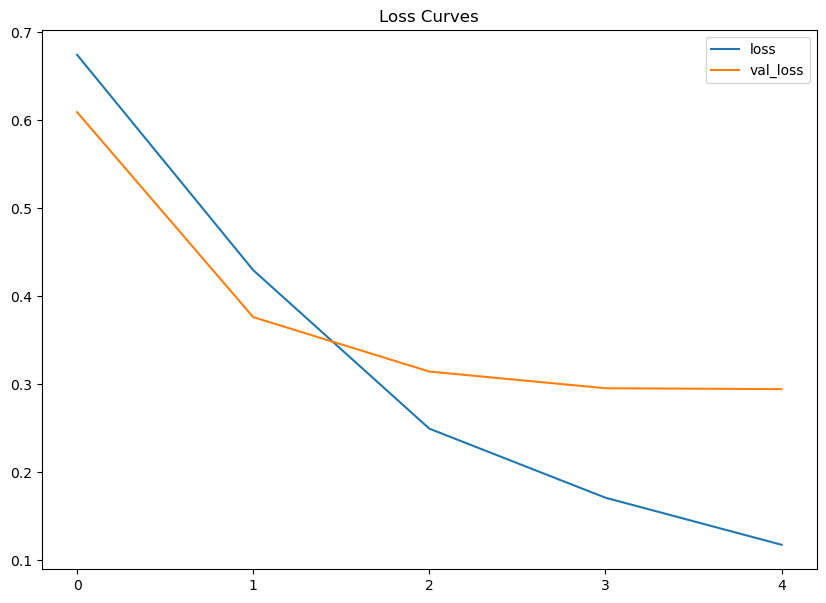

In [29]:
pd.DataFrame(history.history)[['loss', 'val_loss']].plot(figsize=(10,7))
plt.title("Loss Curves")
plt.xticks([0, 1, 2, 3, 4])
plt.show()

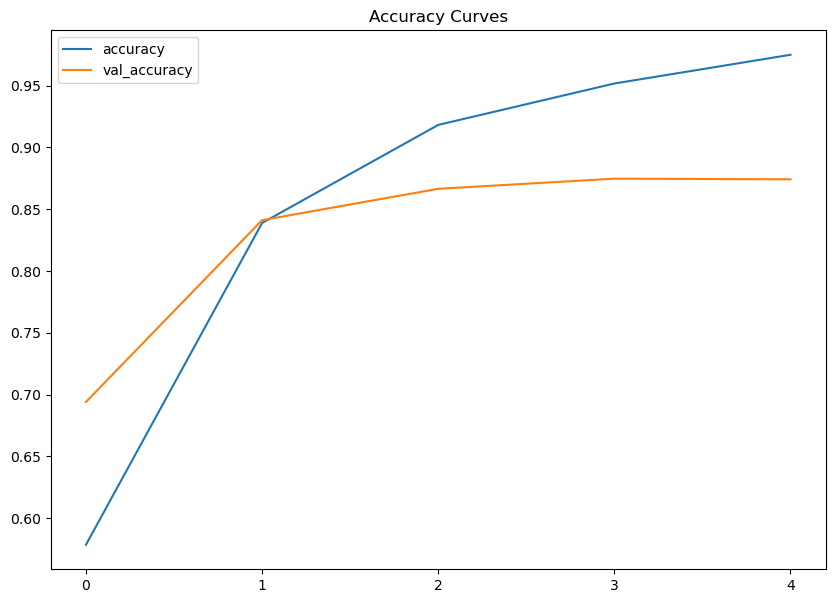

In [33]:
pd.DataFrame(history.history)[['accuracy', 'val_accuracy']].plot(figsize=(10,7))
plt.title("Accuracy Curves")
plt.xticks([0, 1, 2, 3, 4])
plt.show()

In [ ]:
y_pred = model.predict(x_test)

660/782 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step

In [18]:
predicted_labels = (y_pred > 0.5).astype(int)

In [19]:
report = classification_report(y_test, predicted_labels, target_names=['Negative', 'Positive'])
print(report)

              precision    recall  f1-score   support

    Negative       0.90      0.84      0.87     12500
    Positive       0.85      0.90      0.88     12500

    accuracy                           0.87     25000
   macro avg       0.87      0.87      0.87     25000
weighted avg       0.87      0.87      0.87     25000



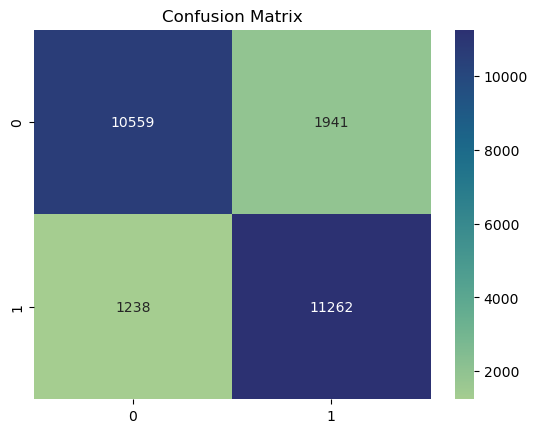

In [20]:
cm = confusion_matrix(y_test, predicted_labels)
sns.heatmap(cm, cmap='crest', annot=True, fmt=".0f")
plt.title("Confusion Matrix")
plt.show()